<a href="https://colab.research.google.com/github/AndrewLukeGill/Machine-Learning/blob/main/SENG474_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the Bankrupcy Status of Large Tech Companies using Data Mining with Stock Exchange Data**

Authors:
James Tang (V00941846), Luke Gill (V00884431), and Olivier Gervais-Gougeon (V00945577)

University of Victoria

June 30, 2023

# 1. Introduction

As an investor, a bank, or someone with a stake in a given company, having a proper understanding of the financial state of said company is important to being able to make well informed decisions about investing. However, particularly when it comes to the stock market, it can often be difficult to judge if a company's financial state is likely to improve or worsen over time. Particularly in the case of tech companies, sometimes a dire financial state might just mean they are on the verge of making a big breakthrough that will make them rise to the top of the market, or simply that they are not far off from going bankrupt. Therefore, in the interest of allowing people to make better investments, or simply for the enjoyment of predicting whether well established tech companies are likely to remain afloat in the future, we can attempt to use data mining techniques to predict whether or not a certain company will go bankrupt in the future.

With this idea in mind, we focus our research on the following question: Can we successfully predict whether or not large tech companies such as Meta (Facebook) are likely to go bankrupt in the future based on their current financial reports when using data mining techniques to compare them to other publicly traded companies on the NASDAQ and New York Exchange?

To achieve this, the following report starts by looking at bankruptcy data from other US companies to find correlations from a dataset provided by Utkarsh Singh on Kaggle [1]. Firstly, results from other notebooks created by users on Kaggle are explored in order to determine what methods provide promising results and which ones to avoid. With this information, the report then goes over its own analysis and interpretation of the data. Preprocessing and model training then ensues and finally, the findings of the improved model are discussed.

## 1.1. About the Dataset
The dataset used in the analysis is the *“US Company Bankruptcy Prediction Dataset”* created by Utkarsh Singh and uploaded to [Kaggle.com](https://www.kaggle.com/) on May 27, 2023 [1]. This dataset contains 78,682 rows of data regarding yearly financial information for 8,262 unique companies in the United-States that are publicly traded on the NASDAQ or New York Stock Exchange. The dataset includes 21 features which mostly consist of various companies' financial data for a given year (from 1999 to 2018). The *status_label* feature then indicates if the company has declared bankruptcy or not within that year (i.e. “alive” or “failed” categories). This is the target feature that the trained model will be trying to predict. More details on the dataset and its features can be found within the dataset's description on Kaggle.

**Dataset**: https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset


# 2. Related Work

The following section takes a look at three interesting notebooks created by various Kaggle users and highlights the methods they use to build a bankruptcy prediction classifier using the *“US Company Bankruptcy Prediction Dataset”* [1]. These methods are then analysed to determine which ones show promise and which ones should be avoided when attempting to design an improved classifier.

Note that in order to keep the report concise, most of the code from the notebooks analysed below has been omited, instead focusing mostly on highlighting the techniques used and results obtained. Nevertheless, it is highly encouraged to look at the original notebooks using the links provided below while reading the current section.

## 2.1. Bankcuptcy prediction via XGBoost by Levi Sverdlov
**Link**: [Bankcuptcy prediction via XGBoost: AUC ROC = 0.89](https://www.kaggle.com/code/levisverdlov/bankcuptcy-prediction-via-xgboost-auc-roc-0-89)


By Levi Sverdlov

The first Kaggle notebook we explore is one by Levi Sverdlov which attempts to use XGBoost to predict company bankrupcy [2]. This project performs minimal preprocessing of the data provided by the set, only converting a single column ('status_label') from a categorical value into a numerical value. No other preprocessing is performed. This is alright because the dataset doesn't include missing data field, however, the notebook fails to explore the possibility that doing feature engineering could potentially improve the training of its model. With preprocessing done however, the dataset is split into training and test sets based on a year, so all data newer than 2016 is used as the test data, and all older data is used as training data. This potentially introduces some inaccuracies into the final model, which might explain why this project has a lower ROC of 89 (as seen below) than some of the other projects using this dataset, especially since the year is somewhat correlated to bankruptcy rates as the set has more bankrupt companies for certain years.

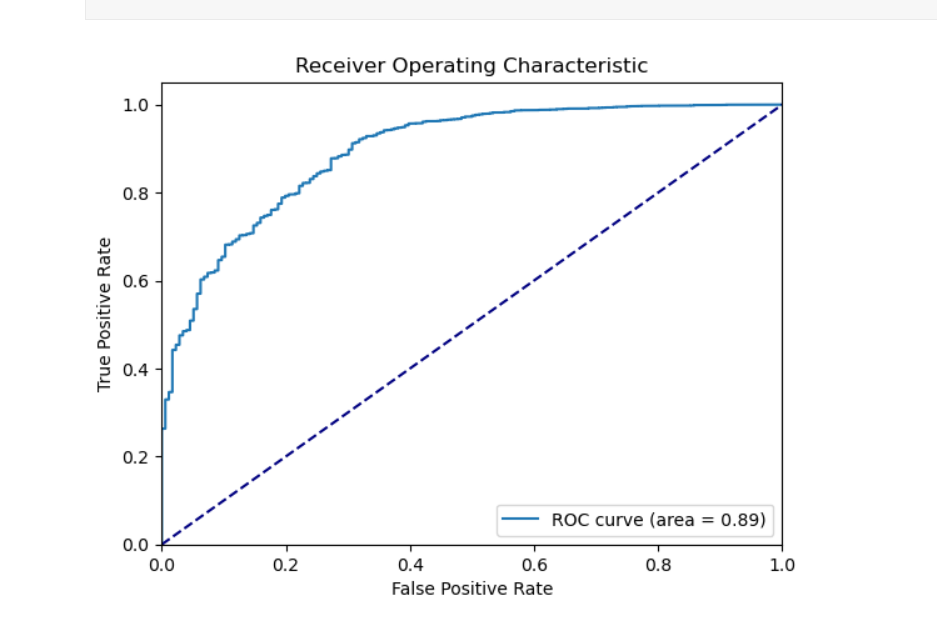

After the training set has been established, the 'status_label' feature is set as the target, and the column 'company_name' is dropped. 'company_name' is not important to the final result as no attempt is made to group financial entries by company during the creating of the model. The learning model used is an XGBClassifier(), with eval_metric = 'auc' and objective='binary_logitistic'. In order to train the classifier, the training set is split once again, this time using train_test_split() instead of an arbitrary date split. No other models are tested and no other parameters for XGBoost, which might have benefitted from fine tuning. In this case, the earlier test set would have potentially been better labeled as the validation set. This project does not test any other learning methods or evaluation metrics to see if better accuracy can be found. Overall, this notebook shows pretty interesting results, however no attempt is made at comparing whether feature engineering or other models could lead to better results. Nevertheless, XGBoost seems like a promising model that could be used when trying to build an improved model later on.


## 2.2. US Company Bankruptcy: 98% Accuracy by James SQ Choi

**Link**: [US Company Bankruptcy: 98% Accuracy](https://www.kaggle.com/code/jamesswchoi/us-company-bankruptcy-prediction-98-accuracy?kernelSessionId=132731388)

by James SQ Choi

Next is a notebook by James SQ Choi [3] that once again analyzes the same American Bankruptcy dataset but this time uses and compares three different ML models (Logistic Regression, Decision Tree, and Random Forest).

The notebook begins by analyzing the dataset to search for missing values to clean up before splitting it into training and testing sets. However, it is discovered that the 'status_label' is heavily imbalanced as there are over 70,000 instances of companies that are still alive but only about 5,000 companies that went bankrupt in the data set. If this part isn't fixed, it could potentially introduce an unbalanced model that gives misleading accuracy metrics or lead to overfitting. Having misleading accuracy metrics means that the model will have worse performance when predicting instances of the minority class which in this case is the percentage of companies being bankrupt. Having overfitted data will lead to a model that is unable to generalize well to new data when it's introduced.

To combat this behaviour, sampling techniques are introduced to increase the minority class and reduce the dominant class to create a more balanced dataset for ML models. Such methods include oversampling, which increases the number of minority class instances to be equal to the dominant class through bootstrapping. Conversely, undersampling can also be used to reduce the number of dominant class instances to match the number of minority class cases.

If we use only one method on the dataset, overfitting or underfitting could still be introduced. In this case, a mix of both over and undersampling are used to deal with the imbalance in target variables. Afterwards the dataset is split into train and test data and models like Logistic Regression, Decision Tree and Random Forest Model are used.

Something else of note is that this notebook also uses Principal Component Analysis to deal with the possibility of multicollinearity. Multicollinearity refers to a dataset where two or more variables are highly correlated to one another. If both variables are highly related to one another, this undermines the significance of the individual variables at hand and can skew the results. PCA (Principal Component Analysis) looks to mitigate this by simplifying the dataset till a point that it still contains most of the information in the original dataset while removing data that is too closely correlated. In essence, the serves to remove unnecessary or essentially duplicate features.

To summarize the findings from this notebook, it reveals that the data is highly imbalanced and that preprocessing should be done to balance the amount of 'alive' and 'failed' companies in the dataset before doing model training. It also highlights the importance of reducing collinearity in the datasets features to overly influencing the model training in a particular direction. Lastly, it shows that Logistic Regression, Decision Tree, and Random Forest are all models that are worth exploring when trying to come up with an improved model.

## 2.3. US Company Bankruptcy Prediction: 93% Accuracy by Utkarsh Singh

**Link**: [US Company Bankruptcy Prediction: 93% Accuracy](https://www.kaggle.com/code/utkarshx27/us-company-bankruptcy-prediction-93-accuracy)

By Utkarsh Singh

The last notebook that was analysed is one by Utkarsh Singh on Kaggle which claims to have 93% accuracy [4]. Overall, this notebook does minimal data preprocessing and then simply runs a Logistic Regression model on the dataset to obtain predictions.

As mentioned in the analysis of the previous notebook, the data in this dataset is quite imbalanced in terms of the amount of '*alive*' vs '*failed*' class instances. This issue can often lead to misleading results. In the case of this notebook, it falls into this trap. Given that practically the only preprocessing that is used on the data is a standard scaler, the class imbalance is still present. This leads the notebook to conclude that it has a 93% accuracy because it is successfully classifying the majority of the data set correctly (as a non-bankrupt company). This makes sense given that the recall score for predicting companies that are still alive is practically a perfect 1.0, along with a precision of 0.93. However, if we look at the classifier's predictions for companies that went bankrupt, the recall is at a staggeringly low 0.01 with a precision of only 0.54. Therefore, because of the lack of correction for the imbalanced data instances for each class, the classification isn't actually that good at predicting companies that have gone bankrupt. Instead, it just gets a good accuracy score because it tends to mostly just predict that a company is alive and it so happens that most of the test set is comprised of companies that are alive.

The issues caused by this imbalance can be seen in the notebook's less than ideal ROC and Precision-Recall curves seen below.

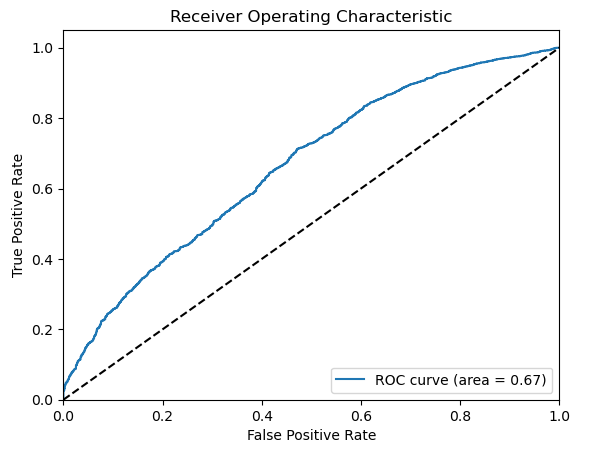

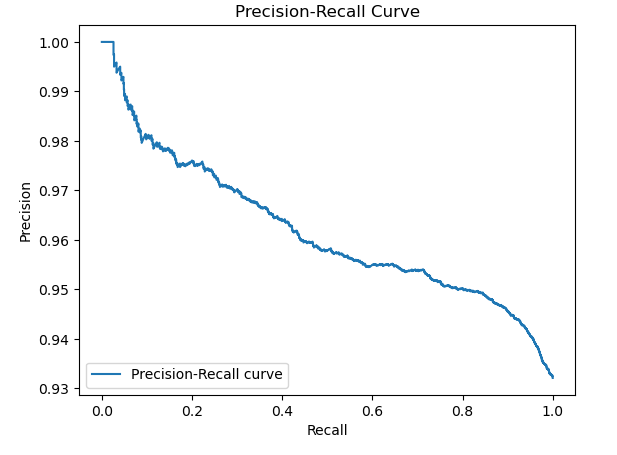


To avoid this issue, the notebook should have first accounted for the data imbalance in its preprocessing step which would allow it to get a more realistic display of results. Furthermore, additional care should have been taken when choosing which features are used for the training of the model, as currently, the notebook simply uses all features (aside from the '*year*' which was removed from the dataset during preprocessing).

In general, removing the '*year*' from the dataset is a debatable choice as it chooses to treat each instance in the set as an independent event without the opportunity to consider how a given company evolves over the years, or how the market as a whole is doing on a particular year. While it remains to be seen whether choosing to treat instances independently or correlating them between years is better, the notebook did not make any observations on the initial data to justify its choice of dropping the '*year*' attribute. Lastly, another oddity of this notebook is that it chooses to include all features aside from the '*year*' and '*company_name*' for model training, even though it presents a feature importance graph that showcases that about half of them have little impact on determining the bankruptcy state. Indeed, the feature importance graph shown below demonstrates that the market value and current assets of a company have a great impact on whether or not it went bankrupt, but about half of the other features have almost no influence on the classification. Despite this, weirdly it was chosen to include all features for the model training. This seems like a missed opportunity to improve the model given its pretty underwhelming scores.

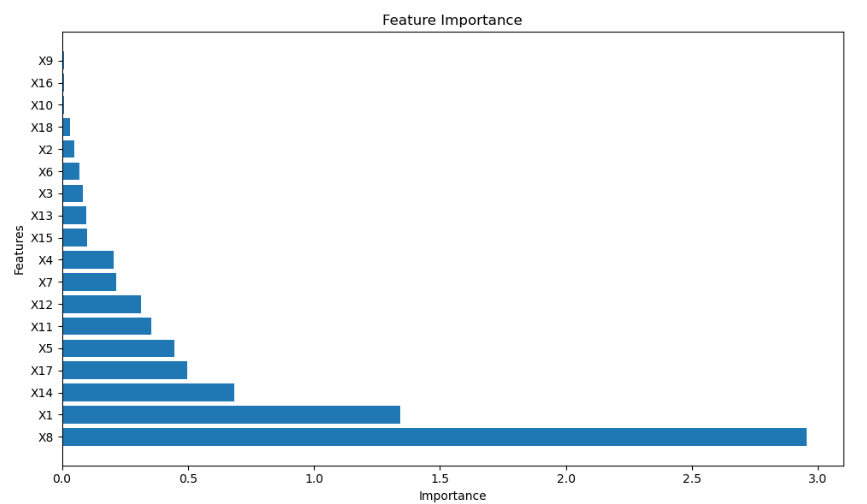

Therefore, with more careful consideration of the features that are used to build the model, there is a good chance that it would be possible to build a good model. Overall, this notebook highlights a handful of pitfalls that should be avoided in order to build a good model for this dataset. The points highlighted above will all have to be taken into consideration when coming up with an improved model.



# 3. Data Preprocessing

Now that existing notebooks have been analysed, we proceed with the goal of creating an improved bankrupcy prediction model based on the findings uncovered in those notebooks. To do this, Section 3 starts by analysis the data by creating various charts in order to have a better understanding of the dataset and find potentially relevant features for model prediciton. The following subsection then does some data preprocessing to ensure the data is in a good format for model training.

## 3.1 Analysing the Data

In order to get a better sense of what preprocessing should be done on the dataset to prepare it for training, we first analyze the data by looking at its features, the count of non-null data, and its distribution. We then also generate a correlation and scatter matrix to find correlations between features so we can know what potential features to prune to deal with potential collinearity.

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install utils

In [ ]:
import io
import matplotlib.pyplot as plt
import utils
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving american_bankruptcy.csv to american_bankruptcy (3).csv


In [ ]:
bankrupt_data = pd.read_csv(io.BytesIO(uploaded['american_bankruptcy.csv']))
data = bankrupt_data
# set up copy

In [ ]:
data.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


As shown in the data sample above, the dataset is comprised of 21 features, 18 of which are numerical attributes. Below is a description of each of the dataset's features. More detailed descriptions of these features can be found on the datasets Kaggle [page](https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset) [1].

**Dataset Numerical Features:**

* X1: Current Assests
* X2: Cost of Goods Sold
* X3: Depreciation and Amortization - Loss of Value over Time
* X4: Earnings before interest, taxes, depreciation, and amortization
* X5: Inventory
* X6: Net Income
* X7: Total Recievables
* X8: Market Value
* X9: Net Sales
* X10: Total Assets
* X11: Long Term Debt
* X12: Earnings before Taxes and Interest
* X13: Gross Profit
* X14: Total Current Liablities
* X15: Retained Earnings - Profit after all expenses
* X16: Total Revenue
* X17: Total Liabilities
* X18: Total Operating Expense

In [ ]:
data.value_counts(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

(company_name  status_label  year  X1        X2        X3        X4        X5       X6         X7        X8           X9         X10        X11        X12        X13        X14       X15         X16        X17        X18      
 C_1           alive         1999  511.267   833.107   18.373    89.031    336.018   35.163    128.348   372.7519     1024.333   740.998    180.447     70.658    191.226    163.816    201.026    1024.333   401.483    935.302      1
 C_614         alive         2009  290.092   310.660   8.720     35.801    98.982    15.727    61.178    302.9888     381.962    333.168    13.197      27.081    71.302     79.760     212.395    381.962    100.576    346.161      1
                             2016  199.604   379.241   23.492    19.197    83.243   -141.660   66.632    140.2568     483.514    393.023    149.179    -4.295     104.273    82.331     108.378    483.514    259.772    464.317      1
                             2015  214.474   476.441   26.674    56.194    96

We observe that all columns have the same number of non-null values and almost all are float. Therefore, no missing value interplotation is needed.

In [ ]:
data['status_label'].value_counts()

alive     73462
failed     5220
Name: status_label, dtype: int64

However, the data is heavily skewed towards the 'alive' label which represents companies that are still in operation. Failing to correct for this imbalance can often lead to misleading or inaccurate results for our model as it becomes easy to get good looking scores just be having a tendency to predict 'alive' without much reason. To correct this, we take a random sample of 'alive' instances that is equal to the amount of 'failed' instances and make a new dataset with an equal amount of 'alive' and 'failed' companies. This allows us to reduce skew.

In [ ]:
failed = data.loc[data['status_label'] == 'failed']
alive = data.loc[data['status_label'] == 'alive'].sample(n=failed.shape[0], random_state=42)
data = pd.concat([failed, alive])
data['status_label'].value_counts(), data.info(),

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10440 entries, 50 to 57193
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  10440 non-null  object 
 1   status_label  10440 non-null  object 
 2   year          10440 non-null  int64  
 3   X1            10440 non-null  float64
 4   X2            10440 non-null  float64
 5   X3            10440 non-null  float64
 6   X4            10440 non-null  float64
 7   X5            10440 non-null  float64
 8   X6            10440 non-null  float64
 9   X7            10440 non-null  float64
 10  X8            10440 non-null  float64
 11  X9            10440 non-null  float64
 12  X10           10440 non-null  float64
 13  X11           10440 non-null  float64
 14  X12           10440 non-null  float64
 15  X13           10440 non-null  float64
 16  X14           10440 non-null  float64
 17  X15           10440 non-null  float64
 18  X16           10440 non-n

(failed    5220
 alive     5220
 Name: status_label, dtype: int64,
 None)

In [ ]:
bankrupt_data = data

array([[<Axes: title={'center': 'year'}>, <Axes: title={'center': 'X1'}>,
        <Axes: title={'center': 'X2'}>, <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>, <Axes: title={'center': 'X7'}>],
       [<Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>,
        <Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>],
       [<Axes: title={'center': 'X12'}>, <Axes: title={'center': 'X13'}>,
        <Axes: title={'center': 'X14'}>, <Axes: title={'center': 'X15'}>],
       [<Axes: title={'center': 'X16'}>, <Axes: title={'center': 'X17'}>,
        <Axes: title={'center': 'X18'}>, <Axes: >]], dtype=object)

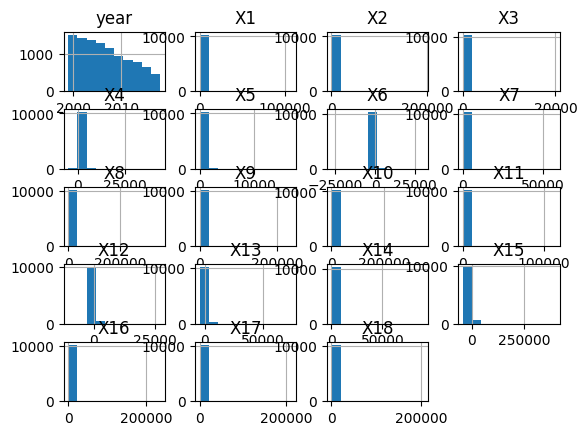

In [ ]:
data.hist()

While the amount of instances for each class is now balanced, the distribution of numerical values is certainly not optimal. Most columns show heavily skewed distributions. Some values are also below zero, so log cannot be applied directly on those columns. The formula used below allows us to take the log even in the case of negative values and avoids division by zero by adding a small offset value.

In [ ]:
data_temp = data[['status_label', 'year']]
data = data.drop(['company_name', 'status_label', 'year'], axis=1)

data = data.apply(lambda x: ((x + 0.000001) / abs(x + 0.000001)) * np.log10(abs(x + 0.000001)))
# add small offsets to counter div by zero errors
# allows log of negative numbers

data[['status_label', 'year']] = data_temp[['status_label', 'year']]

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>],
       [<Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>,
        <Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>],
       [<Axes: title={'center': 'X9'}>, <Axes: title={'center': 'X10'}>,
        <Axes: title={'center': 'X11'}>, <Axes: title={'center': 'X12'}>],
       [<Axes: title={'center': 'X13'}>, <Axes: title={'center': 'X14'}>,
        <Axes: title={'center': 'X15'}>, <Axes: title={'center': 'X16'}>],
       [<Axes: title={'center': 'X17'}>, <Axes: title={'center': 'X18'}>,
        <Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

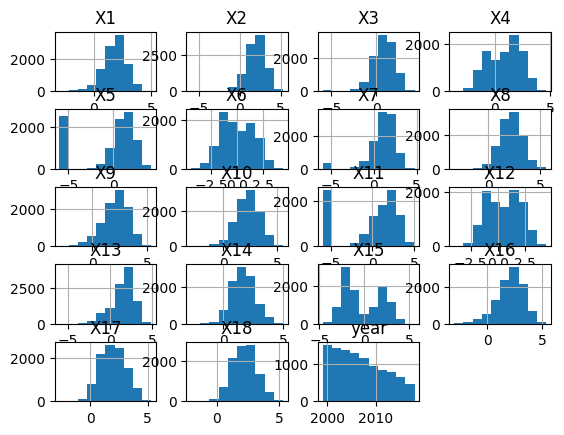

In [ ]:
data.hist()

Now the distributions are much improved.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

status_cat = data[['status_label']]
cat_encoder = OrdinalEncoder()
status_cat_encoded = cat_encoder.fit_transform(status_cat)

data['status_label'] = status_cat_encoded

Next up, we produce a correlation matrix from the data in order to find if some numerical values are correlated. Given that we are building a classifier that will predict a categorical value, we cannot really use correlation of features again our label attribute as correlations are not generally intended for categorical data. Instead, boxplots are use later to find pertinent features in regards to our target feature.

Instead, the correlation matrix is mostly meant to identify collinearity between numerical features in our dataset. As mentioned in the analysis of other Kaggle notebooks, collinearity can lead to skewed classifier results which is why it's often important to identify and remove collinear features.

Here we use a 'coolwarm' heatmap as it is particularly good at visually highlighting values that are highly or extremely poorly correlated, while letting all somewhat correlated value fade into the background. This makes it easier to spot collinear features.

<Axes: >

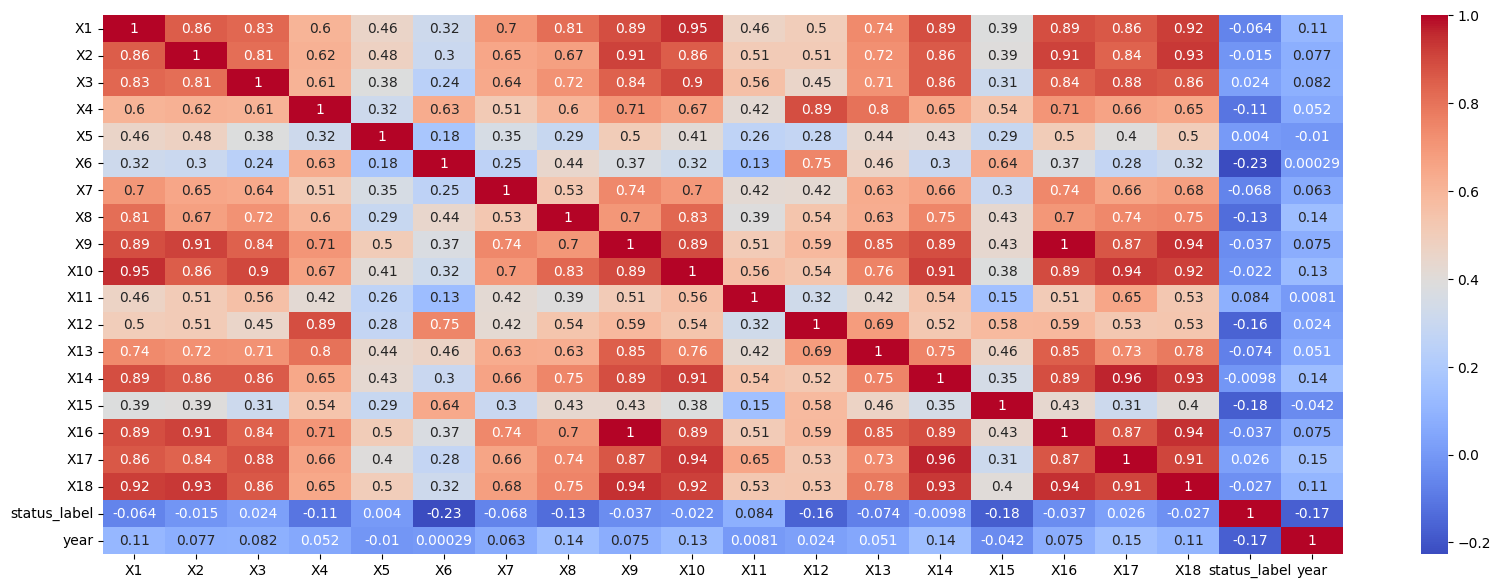

In [ ]:
import seaborn as sns

plt.figure(figsize = (20, 7))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

As we can see, there are quite a few features that are pretty highly correlated which mean we will likely want to exclude one of the features in a highly correlated pair from the final dataset for training.

For example, we would definitly want to avoid having X16 (total revenue) and X9 (net sales) in the final training set, among others. Many of these correlations make sense if we look at the description of features however as they are often monetary values that are directly linked to one another in some way.


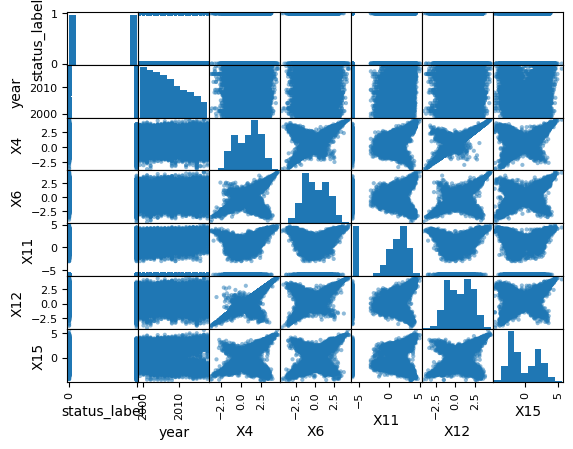

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['status_label',
              'year',
              'X4',
              'X6',
              'X11',
              'X12',
              'X15']

scatter_matrix(data[attributes])
plt.show()

Data is difficult to read and not very useful.

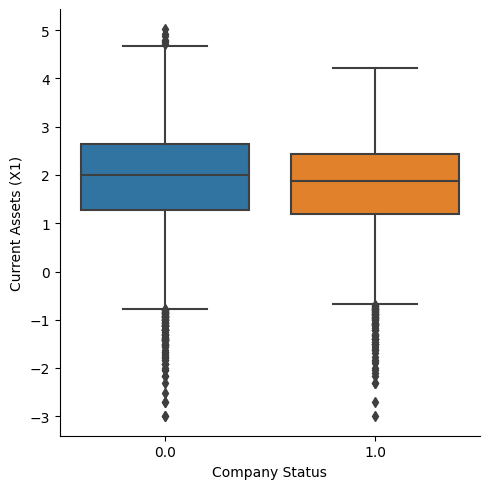

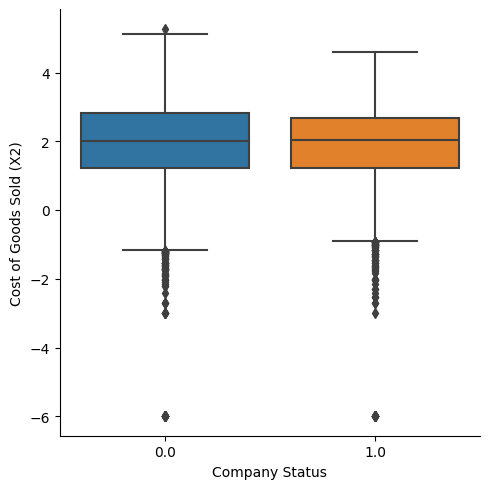

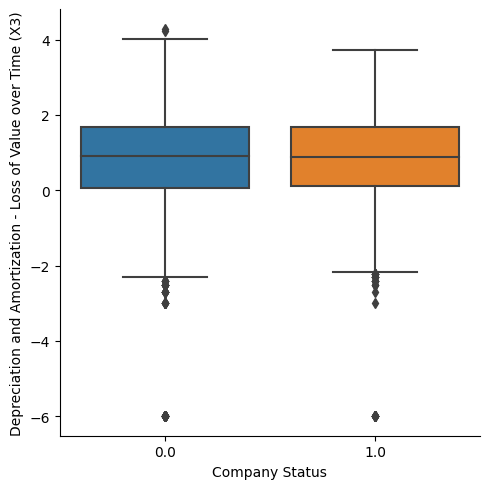

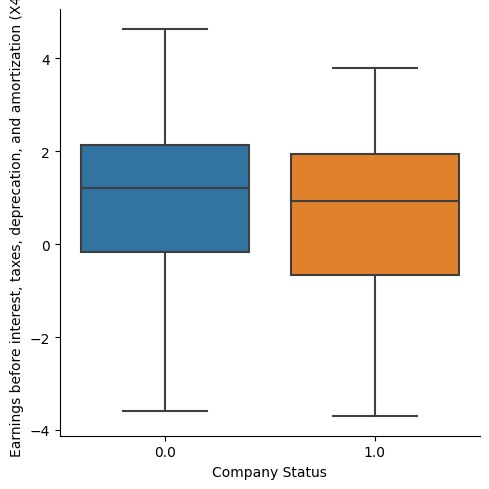

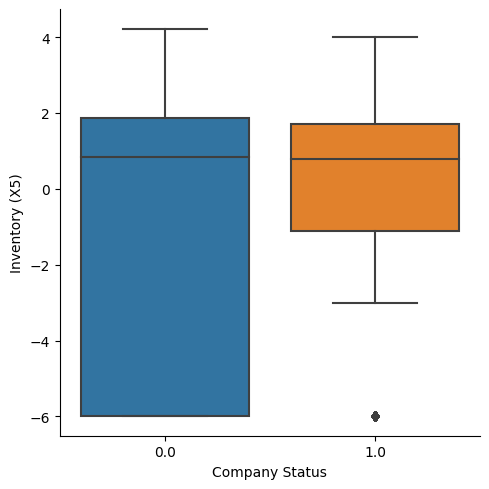

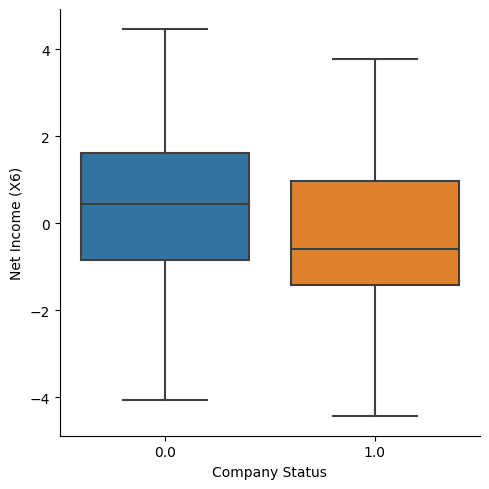

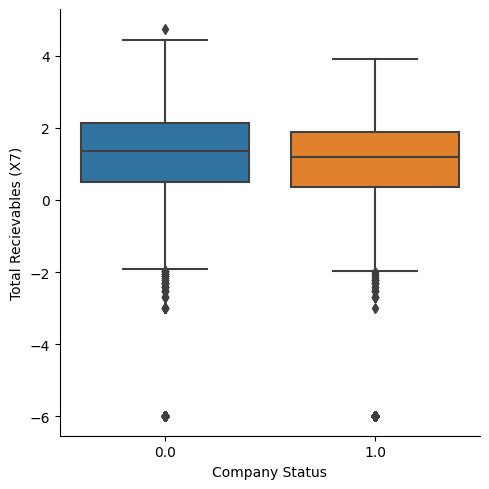

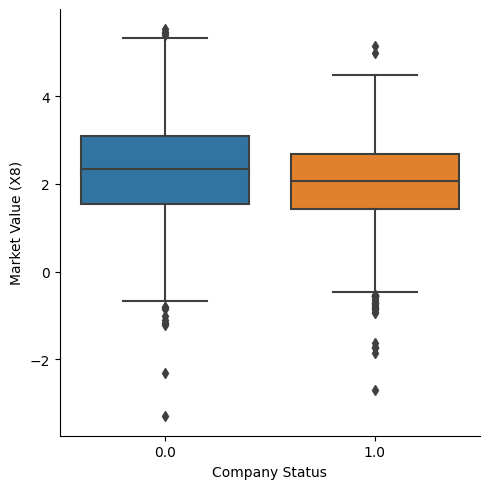

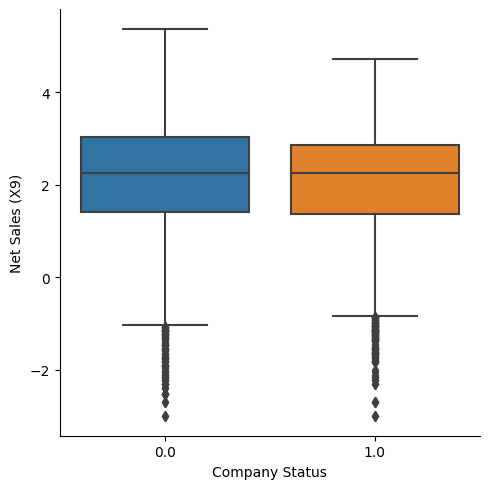

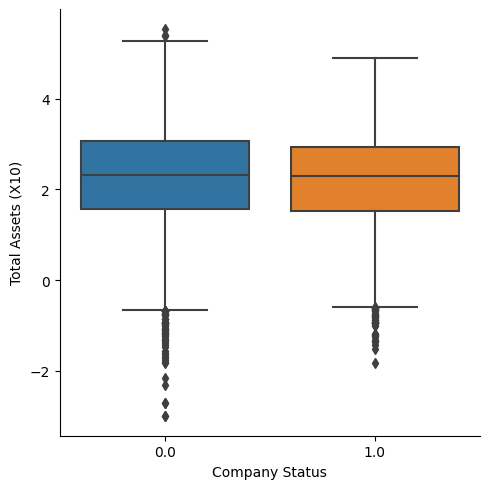

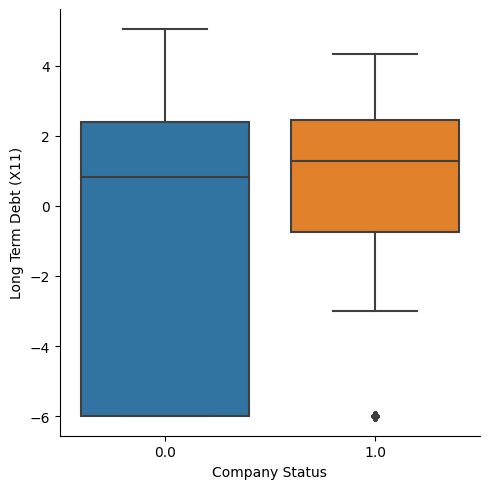

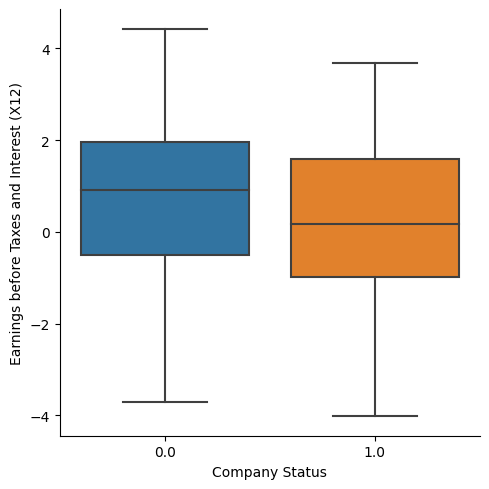

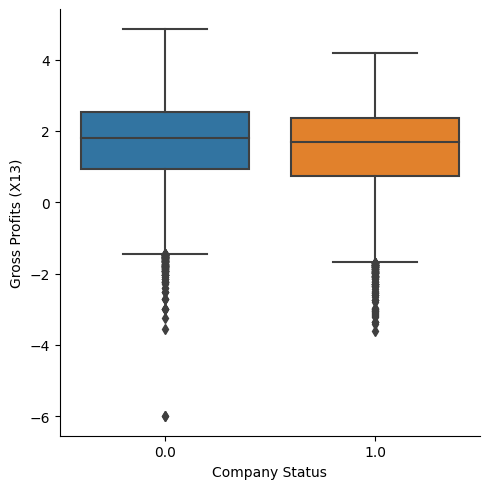

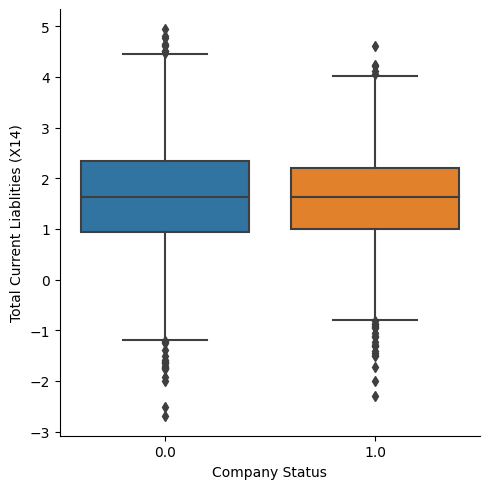

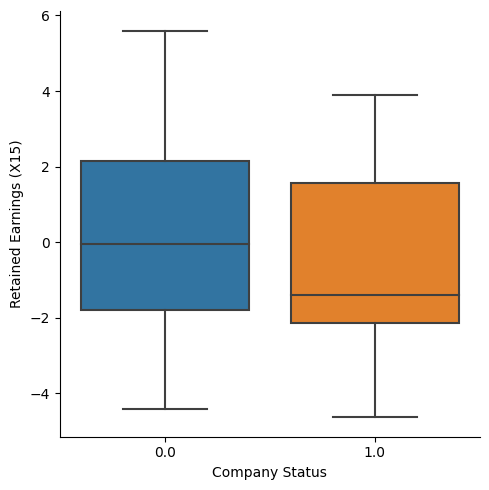

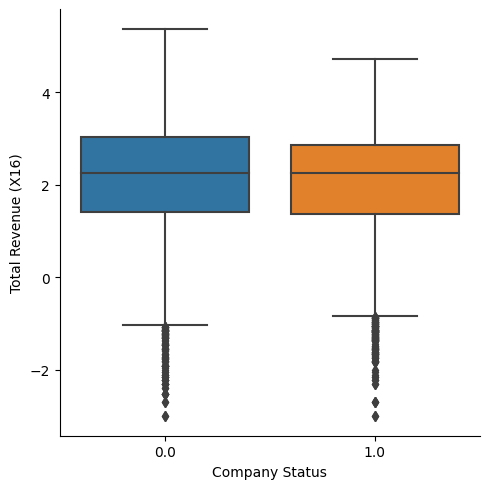

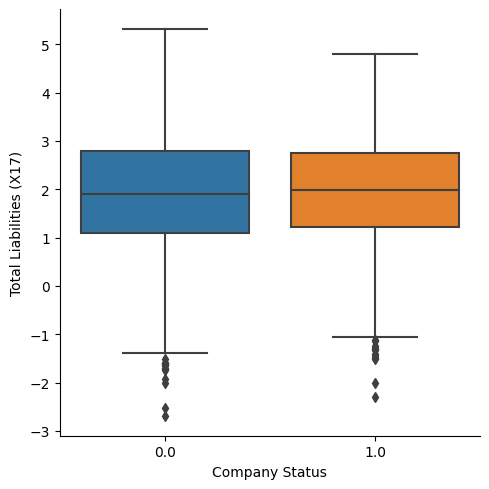

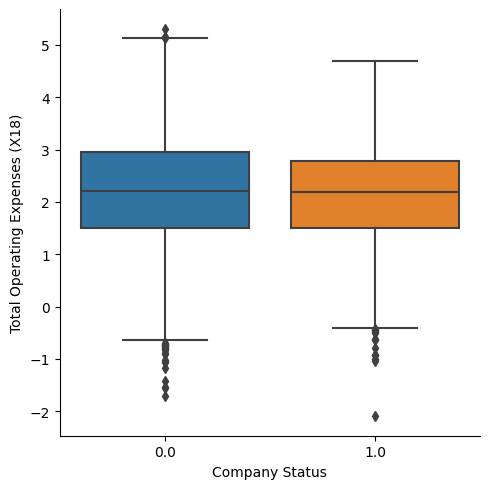

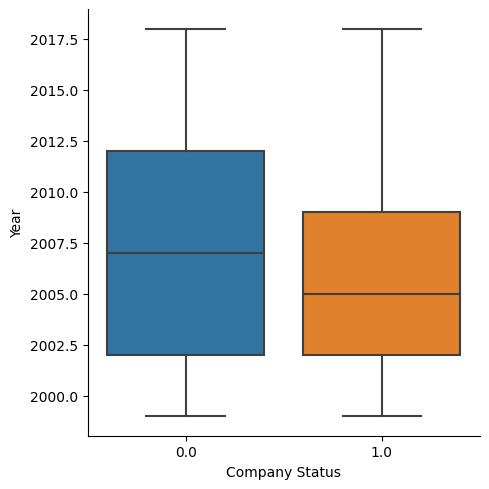

In [ ]:
box1 = sns.catplot(data=data, x="status_label", y="X1", kind='box')
box2 = sns.catplot(data=data, x="status_label", y="X2", kind='box')
box3 = sns.catplot(data=data, x="status_label", y="X3", kind='box')
box4 = sns.catplot(data=data, x="status_label", y="X4", kind='box')
box5 = sns.catplot(data=data, x="status_label", y="X5", kind='box')
box6 = sns.catplot(data=data, x="status_label", y="X6", kind='box')
box7 = sns.catplot(data=data, x="status_label", y="X7", kind='box')
box8 = sns.catplot(data=data, x="status_label", y="X8", kind='box')
box9 = sns.catplot(data=data, x="status_label", y="X9", kind='box')
box10 = sns.catplot(data=data, x="status_label", y="X10", kind='box')
box11 = sns.catplot(data=data, x="status_label", y="X11", kind='box')
box12 = sns.catplot(data=data, x="status_label", y="X12", kind='box')
box13 = sns.catplot(data=data, x="status_label", y="X13", kind='box')
box14 = sns.catplot(data=data, x="status_label", y="X14", kind='box')
box15 = sns.catplot(data=data, x="status_label", y="X15", kind='box')
box16 = sns.catplot(data=data, x="status_label", y="X16", kind='box')
box17 = sns.catplot(data=data, x="status_label", y="X17", kind='box')
box18 = sns.catplot(data=data, x="status_label", y="X18", kind='box')
box19 = sns.catplot(data=data, x="status_label", y="year", kind='box')

box1.set(xlabel='Company Status', ylabel = 'Current Assets (X1)')
box2.set(xlabel='Company Status', ylabel = 'Cost of Goods Sold (X2)')
box3.set(xlabel='Company Status', ylabel = 'Depreciation and Amortization - Loss of Value over Time (X3)')
box4.set(xlabel='Company Status', ylabel = 'Earnings before interest, taxes, deprecation, and amortization (X4)')
box5.set(xlabel='Company Status', ylabel = 'Inventory (X5)')
box6.set(xlabel='Company Status', ylabel = 'Net Income (X6)')
box7.set(xlabel='Company Status', ylabel = 'Total Recievables (X7)')
box8.set(xlabel='Company Status', ylabel = 'Market Value (X8)')
box9.set(xlabel='Company Status', ylabel = 'Net Sales (X9)')
box10.set(xlabel='Company Status', ylabel = 'Total Assets (X10)')
box11.set(xlabel='Company Status', ylabel = 'Long Term Debt (X11)')
box12.set(xlabel='Company Status', ylabel = 'Earnings before Taxes and Interest (X12)')
box13.set(xlabel='Company Status', ylabel = 'Gross Profits (X13)')
box14.set(xlabel='Company Status', ylabel = 'Total Current Liablities (X14)')
box15.set(xlabel='Company Status', ylabel = 'Retained Earnings (X15)')
box16.set(xlabel='Company Status', ylabel = 'Total Revenue (X16)')
box17.set(xlabel='Company Status', ylabel = 'Total Liabilities (X17)')
box18.set(xlabel='Company Status', ylabel = 'Total Operating Expenses (X18)')
box19.set(xlabel='Company Status', ylabel = 'Year')

plt.show()

0 represents companies that are still alive, while 1 represents those that have failed.
Year does have some impact on whether or not a company is alive, with newer companies being less likely to fail.
Retained Earnings (X15) has a noticable drop in median value from alive to failed companies. On average, alive companies have retained earning near 0, while failed companies have retained earnings below 0. Earnings before Taxes and Interest (X12) shows the same pattern as (X15), which is expected given they are similar metrics. Long Term Debt (X11) is on average similar between alive and failed companies, but outlier alive companies often have lower debt. Market Value (X8) is slightly lower in failed companies, but not signficantly. Alive Companies show slower Net Income (X6) than failed ones. Alive companies on average have positive Net Income while failed companies on average have negative net income. Inventory (X5) is on average similar between alive and failed companies, but skew lower for alive companies. Most other features show only minor differences between alive and failed companies.

## 3.2. Transforming the Data

Two copies of training data are prepared. One contains all features, titled pre_process_general, while the other contains hand selected features based on examination of the data done above, titled pre_process_select. Data is then partitioned into training and test sets, and then further into label and feature sets for each.

In [ ]:
from sklearn.model_selection import train_test_split
pre_process_select = bankrupt_data[['status_label', 'year', 'X5', 'X6', 'X8', 'X11', 'X15']]
pre_process_general = bankrupt_data

train_set_select, test_set_select = train_test_split(pre_process_select, test_size=0.2, random_state=42)
train_set_general, test_set_general = train_test_split(pre_process_general, test_size=0.2, random_state=42)

In [ ]:
train_data_select = train_set_select.drop('status_label', axis=1)
train_label = train_set_select[['status_label']]

train_data_general = train_set_general.drop('status_label', axis=1)

test_data_select = test_set_select.drop('status_label', axis=1)
test_label = test_set_select[['status_label']]

test_data_general = test_set_general.drop('status_label', axis=1)

Two seperate pipelines are prepared, once again one for hand selected data and one for general data. Since this dataset only contains numerical data (aside from the label), and no values are missing, processing is relatively straightforwards. First distibutions are evened out using log, then values are scaled with MinMaxScalar for easier training.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

num_attribs_select = ['year', 'X5', 'X6', 'X8', 'X11', 'X15']
num_attribs_general = ['year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

log_apply = FunctionTransformer(
    lambda df: df.apply(lambda x: ((x + 0.000001) / abs(x + 0.000001)) * np.log10(abs(x + 0.000001)))
)

num_pipeline = make_pipeline(
    log_apply,
    MinMaxScaler())

preprocessing_select = ColumnTransformer([
    ("num", num_pipeline, num_attribs_select)])

preprocessing_general = ColumnTransformer([
    ("num", num_pipeline, num_attribs_general)])

data_prepared_select = preprocessing_select.fit_transform(train_data_select)
data_prepared_general = preprocessing_general.fit_transform(train_data_general)

# 4. Building a Model

## 4.1: Training the Model

Three models have been selected: RandomForestClassifier, xgboost, and SVC.
Training labels are encoded numerically using OrdinalEncoder, since RandomForestClassifier and SVC both prefer numerical data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

train_label_encoded = cat_encoder.fit_transform(train_label).ravel()

forest_select = RandomForestClassifier()
forest_select = forest_select.fit(X=data_prepared_select, y=train_label_encoded)

forest_general = RandomForestClassifier()
forest_general = forest_general.fit(X=data_prepared_general, y=train_label_encoded)

Testing revealed that increasing n_estimators improved (marginally) the accuracy of xgboost up to n=600, at which point accuracy remained static. Several different eval_metrics were tested, and it was determined that all were equally valid.

In [ ]:
import xgboost as xgb

xgb_classifier_select = xgb.XGBClassifier(objective="binary:logistic", n_estimators=600, eval_metric='auc', random_state=42)
xgb_classifier_general = xgb.XGBClassifier(objective="binary:logistic", n_estimators=600,  eval_metric='auc', random_state=42)

boost_select = xgb_classifier_select.fit(data_prepared_select, train_label_encoded)
boost_general = xgb_classifier_general.fit(data_prepared_general, train_label_encoded)

Various Gamma values are tested for SVC. Poly kernel was also tested, but processing times were extreme so its accuracy was not ascertained. Based on testing, a gamma of 100 is optimal for this dataset.

In [ ]:
from sklearn.svm import SVC

svm_select_1 = SVC(kernel='rbf', gamma=0.1)
svm_select_1.fit(data_prepared_select, train_label_encoded)

svm_select_2 = SVC(kernel='rbf', gamma=1)
svm_select_2.fit(data_prepared_select, train_label_encoded)

svm_select_3 = SVC(kernel='rbf', gamma=10)
svm_select_3.fit(data_prepared_select, train_label_encoded)

svm_select_4 = SVC(kernel='rbf', gamma=100)
svm_select_4.fit(data_prepared_select, train_label_encoded)

svm_select_5 = SVC(kernel='rbf', gamma=500)
svm_select_5.fit(data_prepared_select, train_label_encoded)

svm_select_6 = SVC(kernel='rbf', gamma=1000)
svm_select_6.fit(data_prepared_select, train_label_encoded)

print(f"Gamma = 0.1: ", svm_select_1.score(data_prepared_select, train_label_encoded),
      "\nGamma = 1.0: ", svm_select_2.score(data_prepared_select, train_label_encoded),
      "\nGamma = 10 : ",  svm_select_3.score(data_prepared_select, train_label_encoded),
      "\nGamma = 100: ", svm_select_4.score(data_prepared_select, train_label_encoded),
      "\nGamma = 500: ", svm_select_5.score(data_prepared_select, train_label_encoded),
      "\nGamma = 1000: ", svm_select_6.score(data_prepared_select, train_label_encoded))

Gamma = 0.1:  0.6384099616858238 
Gamma = 1.0:  0.6606800766283525 
Gamma = 10 :  0.701867816091954 
Gamma = 100:  0.8600335249042146 
Gamma = 500:  0.9879070881226054 
Gamma = 1000:  0.9979645593869731


In [ ]:
svm_general = SVC(kernel='rbf', gamma=100)
svm_general.fit(data_prepared_general, train_label_encoded)

print(f"Gamma = 100: ", svm_general.score(data_prepared_general, train_label_encoded))

Gamma = 100:  0.9920977011494253


## 4.2. Model Validation


In [ ]:
test_data_prepared_select = preprocessing_select.transform(test_data_select)
test_data_prepared_general = preprocessing_general.transform(test_data_general)
test_label_encoded = cat_encoder.fit_transform(test_label)

forest_predict_select = forest_select.predict(test_data_prepared_select)
forest_predict_general = forest_general.predict(test_data_prepared_general)

boost_predict_select = boost_select.predict(test_data_prepared_select)
boost_predict_general = boost_general.predict(test_data_prepared_general)

svm_predict_1 = svm_select_1.predict(test_data_prepared_select)
svm_predict_2 = svm_select_2.predict(test_data_prepared_select)
svm_predict_3 = svm_select_3.predict(test_data_prepared_select)
svm_predict_4 = svm_select_4.predict(test_data_prepared_select)
svm_predict_5 = svm_select_5.predict(test_data_prepared_select)
svm_predict_6 = svm_select_6.predict(test_data_prepared_select)

svm_predict_general = svm_general.predict(test_data_prepared_general)

In [ ]:
from sklearn.metrics import confusion_matrix

forest_cm_select = confusion_matrix(test_label_encoded, forest_predict_select)
forest_cm_general = confusion_matrix(test_label_encoded, forest_predict_general)

boost_cm_select = confusion_matrix(test_label_encoded, boost_predict_select)
boost_cm_general = confusion_matrix(test_label_encoded, boost_predict_general)

forest_cm_select, forest_cm_general, boost_cm_select, boost_cm_general

(array([[668, 359],
        [293, 768]]),
 array([[740, 287],
        [236, 825]]),
 array([[686, 341],
        [336, 725]]),
 array([[719, 308],
        [247, 814]]))

Between forest_select, forest_general, boost_select, and boost_general, forest_general has the best confusion matrix with the lowest number of false positives and false negatives. Second best is boost_general, while forest_select is the worst.

In [ ]:
svm_cm_1 = confusion_matrix(test_label_encoded, svm_predict_1)
svm_cm_2 = confusion_matrix(test_label_encoded, svm_predict_2)
svm_cm_3 = confusion_matrix(test_label_encoded, svm_predict_3)
svm_cm_4 = confusion_matrix(test_label_encoded, svm_predict_4)
svm_cm_5 = confusion_matrix(test_label_encoded, svm_predict_5)
svm_cm_6 = confusion_matrix(test_label_encoded, svm_predict_6)

svm_cm_general = confusion_matrix(test_label_encoded, svm_predict_general)

svm_cm_1, svm_cm_2, svm_cm_3, svm_cm_4, svm_cm_5, svm_cm_6, svm_cm_general

(array([[546, 481],
        [331, 730]]),
 array([[559, 468],
        [277, 784]]),
 array([[592, 435],
        [286, 775]]),
 array([[637, 390],
        [328, 733]]),
 array([[659, 368],
        [347, 714]]),
 array([[419, 608],
        [226, 835]]),
 array([[787, 240],
        [304, 757]]))

svm_general, with a gamma of 100 has the highest number of correctly classified values. svm_3 with a gamma of 10 has the second best score, but it has a large number of incorrectly classified values, particularly false negatives. svm_6 with a gamma of 1000 has the highest number of true negatives, but is also extremely inaccurate in other areas.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

forest_report_select = classification_report(test_label_encoded, forest_predict_select)
forest_report_general = classification_report(test_label_encoded, forest_predict_general)

boost_report_select = classification_report(test_label_encoded, boost_predict_select)
boost_report_general = classification_report(test_label_encoded, boost_predict_general)

print(forest_report_select, forest_report_general, boost_report_select, boost_report_general)


              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67      1027
         1.0       0.68      0.72      0.70      1061

    accuracy                           0.69      2088
   macro avg       0.69      0.69      0.69      2088
weighted avg       0.69      0.69      0.69      2088
               precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      1027
         1.0       0.74      0.78      0.76      1061

    accuracy                           0.75      2088
   macro avg       0.75      0.75      0.75      2088
weighted avg       0.75      0.75      0.75      2088
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67      1027
         1.0       0.68      0.68      0.68      1061

    accuracy                           0.68      2088
   macro avg       0.68      0.68      0.68      2088
weighted avg       0.68      0.68      0.68      2088
               preci

Forest_general is once again the best with the highest weighted average and best f1 scores. boost_general is the second best, and boost_select is the worst.

In [ ]:
svm_report_1 = classification_report(test_label_encoded, svm_predict_1)
svm_report_2 = classification_report(test_label_encoded, svm_predict_2)
svm_report_3 = classification_report(test_label_encoded, svm_predict_3)
svm_report_4 = classification_report(test_label_encoded, svm_predict_4)
svm_report_5 = classification_report(test_label_encoded, svm_predict_5)
svm_report_6 = classification_report(test_label_encoded, svm_predict_6)

svm_report_general = classification_report(test_label_encoded, svm_predict_general)

print(svm_report_1, svm_report_2, svm_report_3, svm_report_4, svm_report_5, svm_report_6, svm_report_general)

              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57      1027
         1.0       0.60      0.69      0.64      1061

    accuracy                           0.61      2088
   macro avg       0.61      0.61      0.61      2088
weighted avg       0.61      0.61      0.61      2088
               precision    recall  f1-score   support

         0.0       0.67      0.54      0.60      1027
         1.0       0.63      0.74      0.68      1061

    accuracy                           0.64      2088
   macro avg       0.65      0.64      0.64      2088
weighted avg       0.65      0.64      0.64      2088
               precision    recall  f1-score   support

         0.0       0.67      0.58      0.62      1027
         1.0       0.64      0.73      0.68      1061

    accuracy                           0.65      2088
   macro avg       0.66      0.65      0.65      2088
weighted avg       0.66      0.65      0.65      2088
               preci

svm_6 with a gamma of 1000 has the best recall of failed companies among all models tested at .79, but it also suffers from low precision and very poor recall of surviving companies. svm_4 with a gamma of 100 has good, balanced scores in all areas along with relatively high recall of failed companies, so a gamma of 100 was selected for the svm_general model, which proved to be among the best tested.

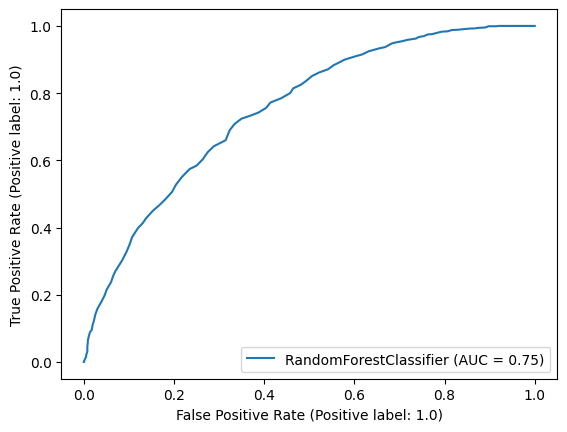

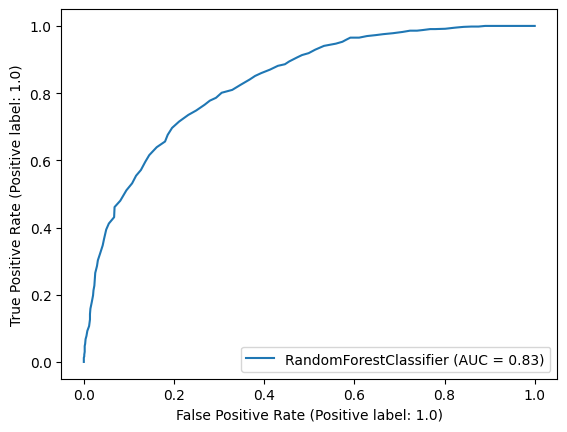

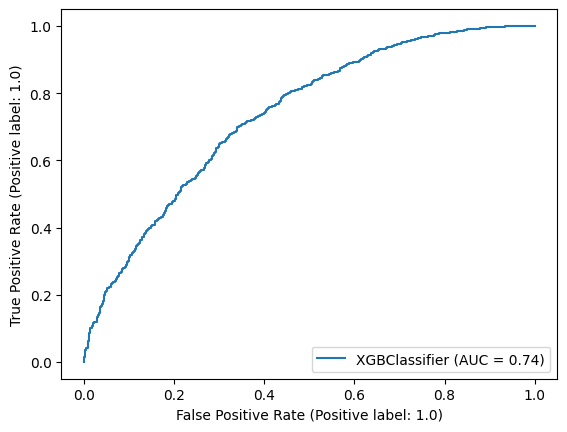

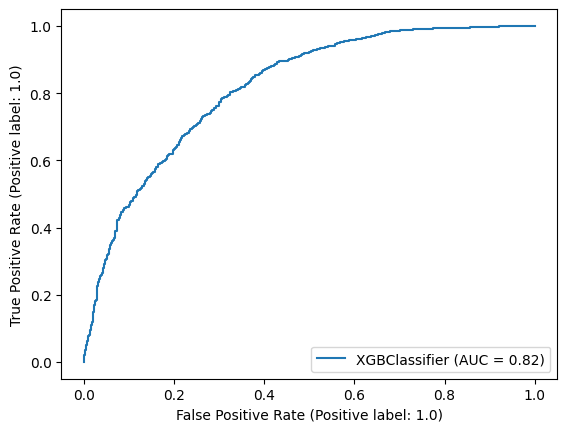

In [ ]:
from sklearn.metrics import RocCurveDisplay

forest_ROC_select = RocCurveDisplay.from_estimator(forest_select, test_data_prepared_select, test_label_encoded)
forest_ROC_general = RocCurveDisplay.from_estimator(forest_general, test_data_prepared_general, test_label_encoded)

boost_ROC_select = RocCurveDisplay.from_estimator(boost_select, test_data_prepared_select, test_label_encoded)
boost_ROC_general = RocCurveDisplay.from_estimator(boost_general, test_data_prepared_general, test_label_encoded)

plt.show()

Similar to previous results, general models proved to be more accurate than those trained on selected features. Forest_general is the best by ROC, followed closely by boost_general.

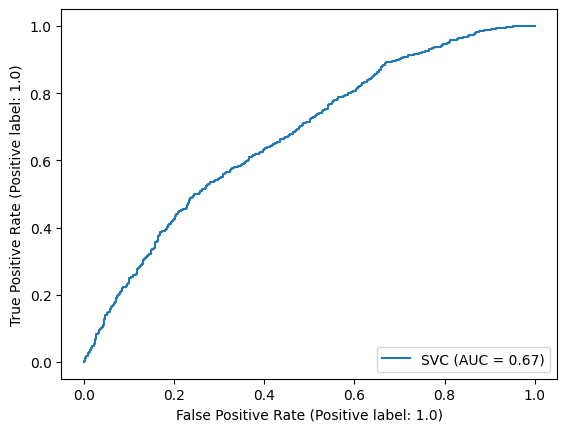

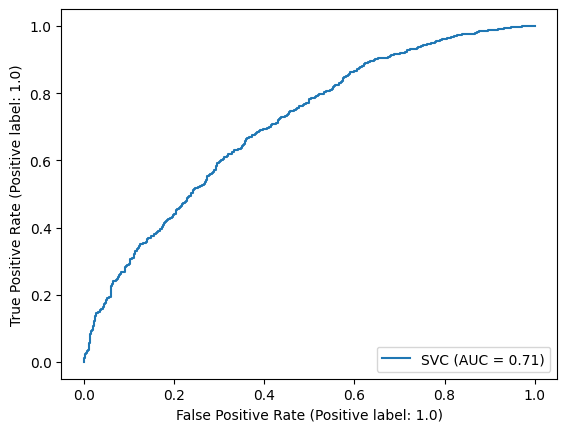

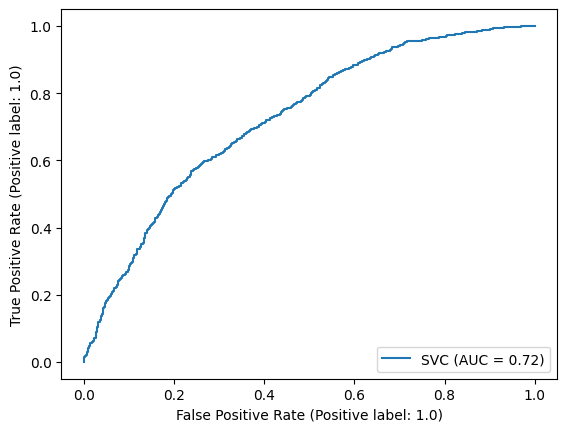

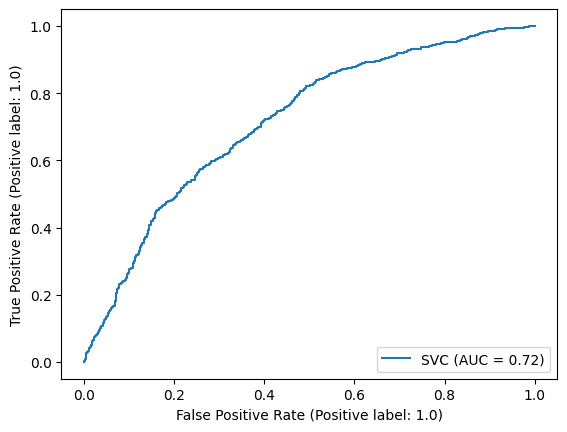

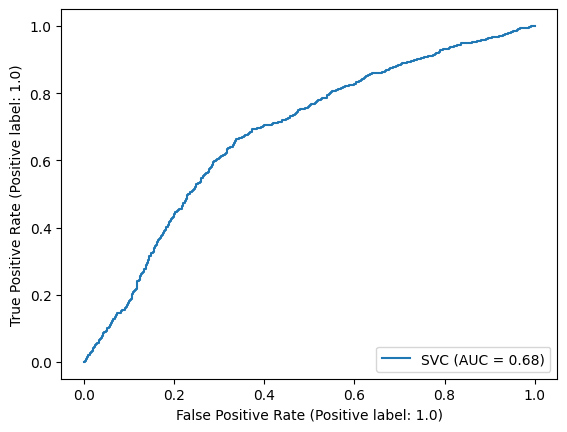

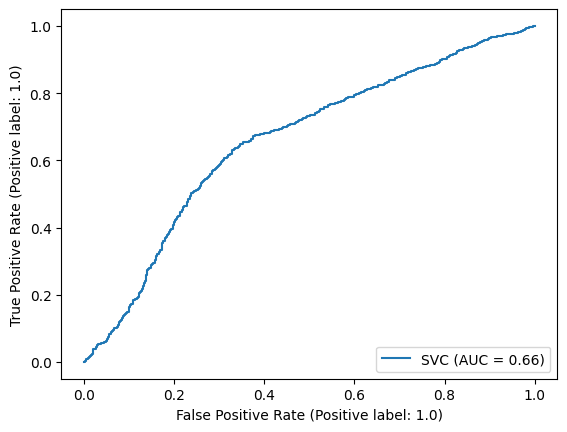

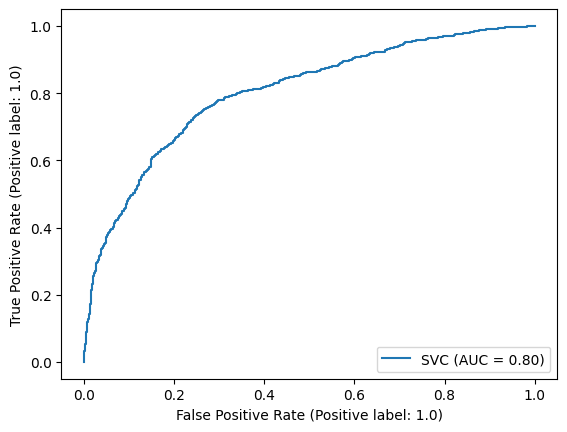

In [ ]:
svm_roc_1 = RocCurveDisplay.from_estimator(svm_select_1, test_data_prepared_select, test_label_encoded)
svm_roc_2 = RocCurveDisplay.from_estimator(svm_select_2, test_data_prepared_select, test_label_encoded)
svm_roc_3 = RocCurveDisplay.from_estimator(svm_select_3, test_data_prepared_select, test_label_encoded)
svm_roc_4 = RocCurveDisplay.from_estimator(svm_select_4, test_data_prepared_select, test_label_encoded)
svm_roc_5 = RocCurveDisplay.from_estimator(svm_select_5, test_data_prepared_select, test_label_encoded)
svm_roc_6 = RocCurveDisplay.from_estimator(svm_select_6, test_data_prepared_select, test_label_encoded)

svm_roc_general = RocCurveDisplay.from_estimator(svm_general, test_data_prepared_general, test_label_encoded)

svm_4 amd svm_4 have the best ROC curves, with gammas of 10 and 100 respectively. svm_6 with a gamma of 1000 has the worst ROC curve out of all models tested. svm_general with a gamma of 100 is competitive with boost_general and forest_general.

## 4.3 Evaluation Against Other Companies

Data from other companies not included in the main set has been manually gathered to create new entries to validate our model. The top three performing models are tested against data from Meta and Blockbuster, Meta being currently in business and Blockbuster having gone bankrupt.

In [ ]:
uploaded_2 = files.upload()

Saving evaluation_set.csv to evaluation_set.csv


In [ ]:
eval_data = pd.read_csv('evaluation_set.csv')

In [ ]:
eval_data.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_META,alive,2021,66666,22649.0,7967.0,47284,0.0,39370.0,9829.0,...,117929.0,167987.0,677,46753,95280.0,41108.0,1560.0,117929.0,41108.0,71176.0
1,C_BLOCKBUSTER,failed,2009,1060,1879.9,146.6,195,298.5,-558.2,79.4,...,4051.1,1538.3,836,230,2171.2,934.8,5786.9,3590.8,1940.2,2154.2


The top three models are forest_general, boost_general, and svm_general.

In [ ]:
eval_labels = eval_data[['status_label']]
eval_processed_general = preprocessing_general.fit_transform(eval_data.drop(['status_label', 'company_name'], axis=1))
eval_labels_encoded = cat_encoder.fit_transform(eval_labels).ravel()

In [ ]:
eval_forest = forest_general.predict(eval_processed_general)
eval_boost = boost_general.predict(eval_processed_general)
eval_svm = svm_general.predict(eval_processed_general)

eval_forest, eval_boost, eval_svm

(array([0., 0.]), array([0, 0]), array([0., 0.]))

All three models predict that Meta will continue to operate, but they also predict that Blockbuster will, which is incorrect.

# 5. Conclusions

While we were able to achieve decent accuracy and precision with our final models, we were not able to beat the ROC curve of the best notebook we examined when using only the hand selected features. That being said, two of the tree Kaggle notebooks had bad recall and precision when predicting failures due to forgetting to account for the unbalanced dataset. By correcting the unbalanced dataset, we were able to get relatively good precision and recall of 0.74 and 0.78 respectively when predicting bankrupt companies. Because the unbalanced classifiers from the Kaggle notebooks had a tendency to just predict 'alive', they had better scores for the 'alive' class. However, we would argue that when making bankrupcy prediction, it is more important to have good precission and recall for bankrupt companies than it is to classify many companies that are 'alive' at the cost of missing all bankrupt companies. While the overall accuracy score appears worse, being able to predict bankrupt companies better means the classifier ends up being more useful in the real world.

In terms of specifics, of the three types of classifiers we trained,RandomForestClassifier trained with all features aside from company_name was the most accurate, achieving approximately 75% accuracy and 82% ROC. The other two models, XGBoost and SVC both achieve only slightly worse performance while trained on all features. Attempting to prune down the featureset into a few critical features lead to worse overall results in most cases as models trained on the hand selected features were less accurate than those trained on all features. Analysis showed that no one feature was strongly correlated with the status of companies, so it is probably necessary to make use of as many features as possible.

Lastly, we wanted to see how the model would do against some new data we gathered manually for certain companies. While our trained models were able to accurately predict the status of Meta (Facebook), all three incorrectly predicted that Blockbuster Video would not go bankrupt. Thus we must conclude that our models cannot reliably predict outcomes for all companies outside of the dataset.

# 6. Summary

After examining three other projects that attempt to predict bankrupcy given the same dataset, we first started by using a random sampling of 'alive' companies to create a balanced dataset that has an equal amount of bankrupt and non-bankrupt entries. We then examined it and identified six key features: Retained Earnings, Long Term Debt, Market Value, Net Income, Inventory, and Year. We trained three models (RandomForestClassifier, XGBoost, and SVC) on both this subset of promising features and again on all features. We found that RandomForestClassifier trained on all features had the best performance out of these models. While the model got decent scores against the test set, using it on the small amount of hand collected data we gathered shows that it was not able to reliably predict outcomes for companies outside the dataset in all cases. Therefore, our findings highlight that balancing the dataset can lead to better scores for the 'failed' class at the cost of the 'alive' scores. The model still generally performs better with all the features however. Overall, these findings show that further research would still be needed in order to improve scores even further to a level that could be considered to give reliable predictions. Still, we were able to improve some scores in particular scenarios which is pretty good considering that bankrupcy prediction is often hard to generalize as companies can go bankrupt for a multitude of vastly different reasons.

# References

[1] U. Singh, “US company Bankruptcy Prediction Dataset,” Kaggle, https://www.kaggle.com/datasets/utkarshx27/american-companies-bankruptcy-prediction-dataset (accessed Jun. 30, 2023).

[2] L. Sverdlov, “Bankcuptcy prediction via XGBoost: Auc Roc = 0.89,” Kaggle, https://www.kaggle.com/code/levisverdlov/bankcuptcy-prediction-via-xgboost-auc-roc-0-89 (accessed Jun. 30, 2023).

[3] J. S. W. Choi, “US company bankruptcy prediction: 98% accuracy,” Kaggle, https://www.kaggle.com/code/jamesswchoi/us-company-bankruptcy-prediction-98-accuracy#Dealing-with-the-imbalance-in-target-variable (accessed Jun. 30, 2023).

[4] U. Singh, “US company bankruptcy prediction: 93% accuracy,” Kaggle, https://www.kaggle.com/code/utkarshx27/us-company-bankruptcy-prediction-93-accuracy (accessed Jun. 30, 2023).

[5] “ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2022,” Meta Platforms Inc., https://d18rn0p25nwr6d.cloudfront.net/CIK-0001326801/e574646c-c642-42d9-9229-3892b13aabfb.pdf (accessed Jun. 30, 2023).

[6] “ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934 For the fiscal year ended December 31, 2021,” Meta Platforms Inc., https://s21.q4cdn.com/399680738/files/doc_financials/annual_reports/2023/2021-Annual-Report.pdf (accessed Jun. 30, 2023).

[7] “Meta platforms total liabilities 2010-2023: Meta,” Macrotrends, https://www.macrotrends.net/stocks/charts/META/meta-platforms/total-liabilities (accessed Jun. 30, 2023).

[8] “Bliaq - Blockbuster Stock Income Statement,” Barchart.com, https://www.barchart.com/stocks/quotes/BLIAQ/income-statement/annual (accessed Jun. 30, 2023).

[9] “&nbsp; ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934&nbsp; For the fiscal year ended January 3, 2010.,” Blockbuster Inc., https://www.sec.gov/Archives/edgar/data/1085734/000119312510058339/d10k.htm (accessed Jun. 30, 2023).